# **TASK 1**

In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

Total Revenue: $689995.56
Revenue per Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

Top 5 Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64

Customer Purchase Frequency:
 count    199.000000
mean       5.025126
std        2.198340
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: TransactionID, dtype: float64

Average Order Value:
 count     199.000000
mean      687.580182
std       237.936649
min        82.360000
25%       542.941667
50%       677.207500
75%       828.624167
max      1323.133333
Name: TotalValue, dtype: float64


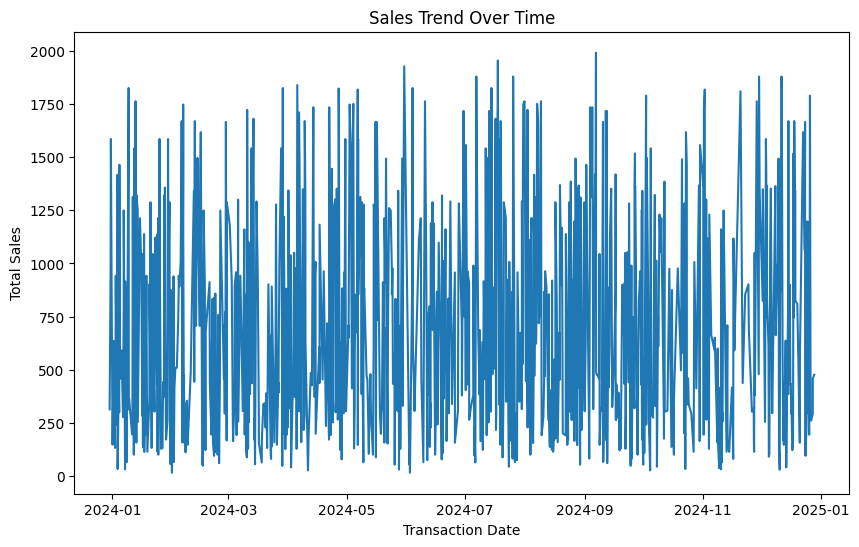

In [43]:
merged_df = pd.merge(transactions, customers, on='CustomerID')
merged_df = pd.merge(merged_df, products, on='ProductID')

total_revenue = merged_df['TotalValue'].sum()
revenue_per_region = merged_df.groupby('Region')['TotalValue'].sum()

print(f"Total Revenue: ${total_revenue}")
print("Revenue per Region:\n", revenue_per_region)

top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Selling Products:\n", top_products)

purchase_frequency = merged_df.groupby('CustomerID')['TransactionID'].count()
print("\nCustomer Purchase Frequency:\n", purchase_frequency.describe())

average_order_value = merged_df.groupby('CustomerID')['TotalValue'].mean()
print("\nAverage Order Value:\n", average_order_value.describe())

sales_trend = merged_df.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_trend.index, sales_trend.values)
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.show()

Total Revenue: $689,995.56

Revenue per Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

Top 10 Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64

Customer Purchase Frequency Statistics:
 count    199.000000
mean       5.025126
std        2.198340
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: TransactionID, dtype: float64

Average Order Value Statistics:
 count     199.000000
mean      687.580182
std       237.936649
min        82.360000
25%       542.941667
50%       677.207500
75%       828.624167
max      1323.133333
Name:

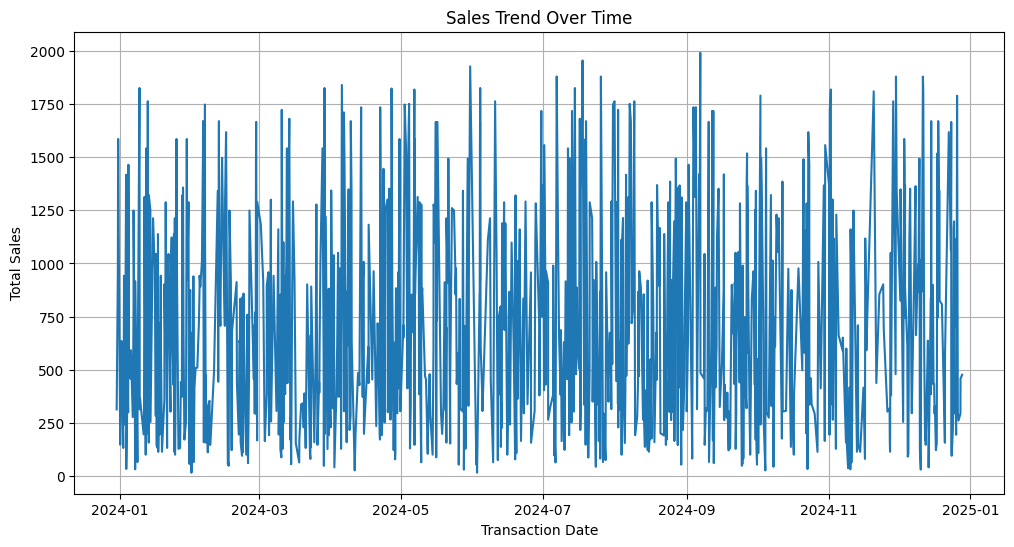

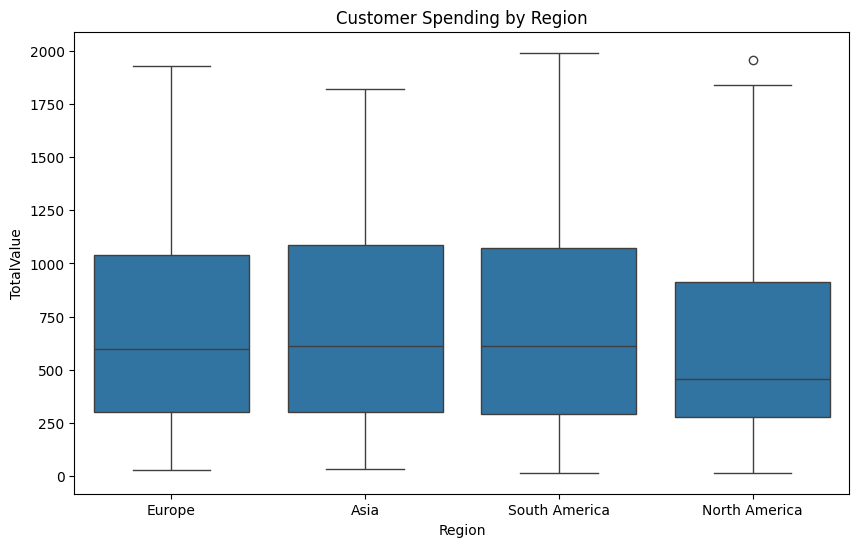


--- Business Insights ---
Insight 1: The highest revenue is generated in South America.
Insight 2: ActiveWear Smartwatch is the best-selling product.
Insight 3: Customers make an average of 5.03 transactions.
Insight 4: The average order value is $687.58.


In [44]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
merged_df = pd.merge(transactions, customers, on='CustomerID')
merged_df = pd.merge(merged_df, products, on='ProductID')

total_revenue = merged_df['TotalValue'].sum()
revenue_per_region = merged_df.groupby('Region')['TotalValue'].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")
print("\nRevenue per Region:\n", revenue_per_region)

top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Selling Products:\n", top_products)

purchase_frequency = merged_df.groupby('CustomerID')['TransactionID'].count()
print("\nCustomer Purchase Frequency Statistics:\n", purchase_frequency.describe())

average_order_value = merged_df.groupby('CustomerID')['TotalValue'].mean()
print("\nAverage Order Value Statistics:\n", average_order_value.describe())

sales_trend = merged_df.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values)
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=merged_df)
plt.title('Customer Spending by Region')
plt.show()

print("\n--- Business Insights ---")
highest_revenue_region = revenue_per_region.idxmax()
print(f"Insight 1: The highest revenue is generated in {highest_revenue_region}.")


best_selling_product = top_products.index[0]
print(f"Insight 2: {best_selling_product} is the best-selling product.")

avg_purchases = purchase_frequency.mean()
print(f"Insight 3: Customers make an average of {avg_purchases:.2f} transactions.")

avg_order = average_order_value.mean()
print(f"Insight 4: The average order value is ${avg_order:.2f}.")

<ipython-input-45-393e3577be50>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_region.index, y=revenue_per_region.values, palette='viridis')


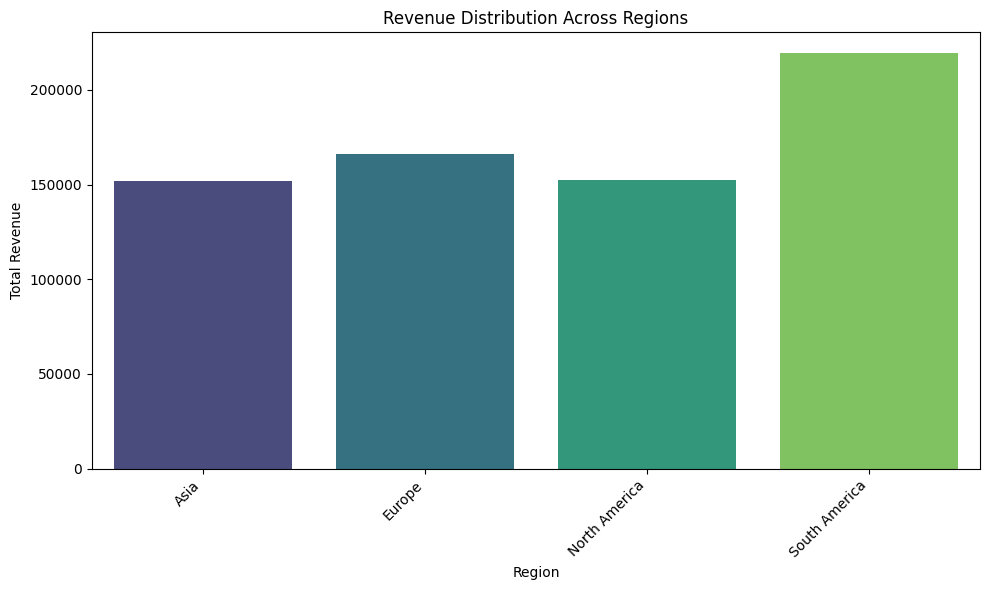

Revenue Analysis:
          Region  Total Revenue
0           Asia      152074.97
1         Europe      166254.63
2  North America      152313.40
3  South America      219352.56


<ipython-input-45-393e3577be50>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='magma')


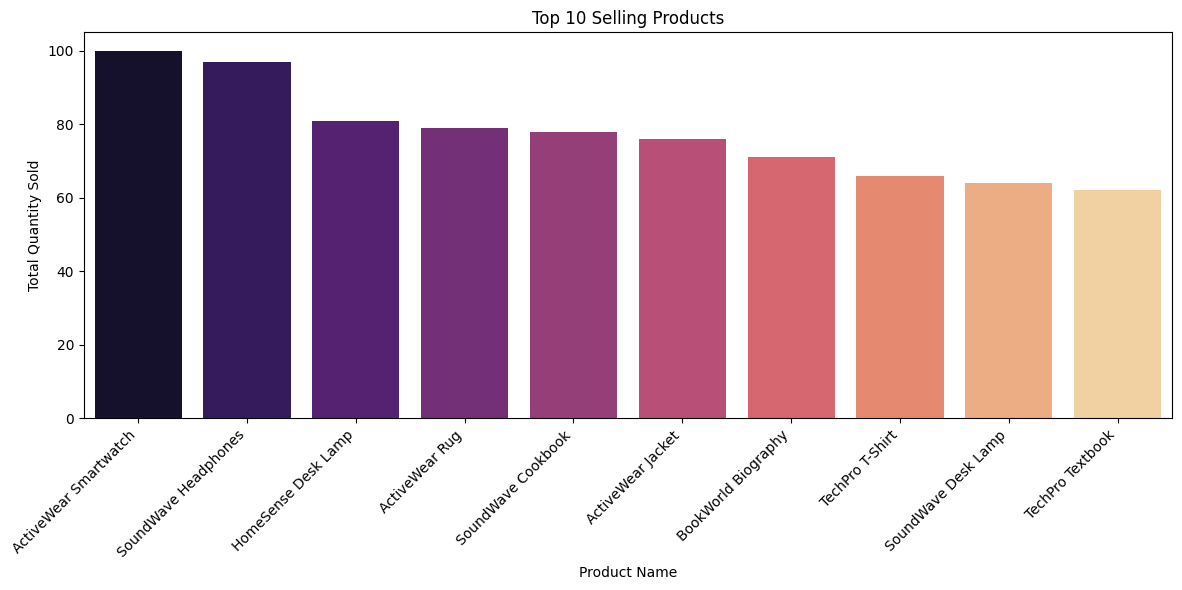


Top Selling Products:
            Product Name  Total Quantity Sold
0  ActiveWear Smartwatch                  100
1   SoundWave Headphones                   97
2    HomeSense Desk Lamp                   81
3         ActiveWear Rug                   79
4     SoundWave Cookbook                   78
5      ActiveWear Jacket                   76
6    BookWorld Biography                   71
7        TechPro T-Shirt                   66
8    SoundWave Desk Lamp                   64
9       TechPro Textbook                   62


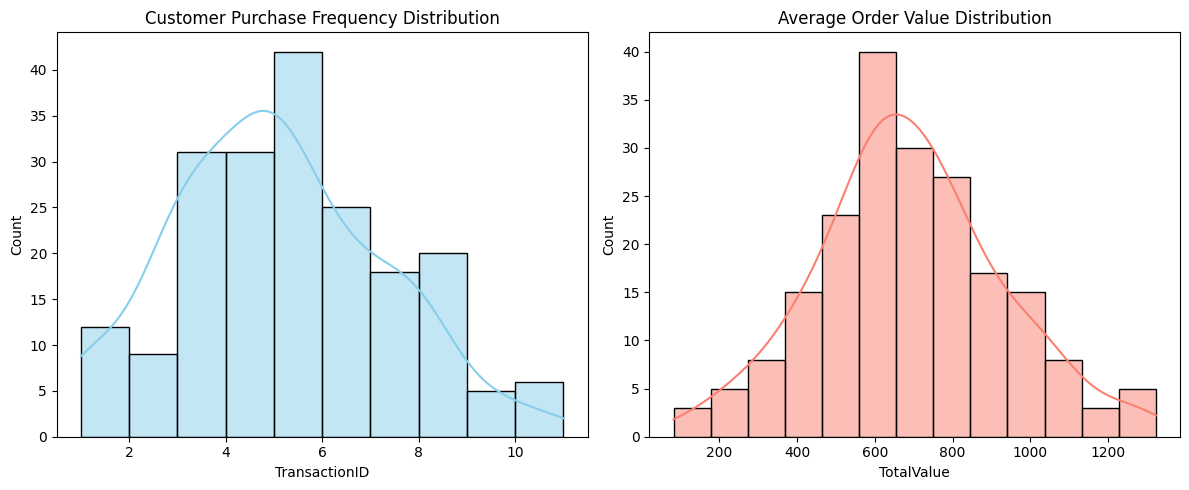


Customer Purchase Frequency Statistics:
  Statistic       Value
0     count  199.000000
1      mean    5.025126
2       std    2.198340
3       min    1.000000
4       25%    3.000000
5       50%    5.000000
6       75%    6.000000
7       max   11.000000

Average Order Value Statistics:
  Statistic        Value
0     count   199.000000
1      mean   687.580182
2       std   237.936649
3       min    82.360000
4       25%   542.941667
5       50%   677.207500
6       75%   828.624167
7       max  1323.133333

--- Business Insights ---


,Insight,Value
0,Highest Revenue Region,South America
1,Best-Selling Product,ActiveWear Smartwatch
2,Average Customer Purchases,5.03
3,Average Order Value,$687.58


In [45]:
total_revenue = merged_df['TotalValue'].sum()
revenue_per_region = merged_df.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_per_region.index, y=revenue_per_region.values, palette='viridis')
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Revenue Distribution Across Regions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

revenue_table = pd.DataFrame({'Region': revenue_per_region.index, 'Total Revenue': revenue_per_region.values})
print("Revenue Analysis:")
print(revenue_table)

top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='magma')
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Selling Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

product_table = pd.DataFrame({'Product Name': top_products.index, 'Total Quantity Sold': top_products.values})
print("\nTop Selling Products:")
print(product_table)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(purchase_frequency, kde=True, color='skyblue')
plt.title('Customer Purchase Frequency Distribution')

plt.subplot(1, 2, 2)
sns.histplot(average_order_value, kde=True, color='salmon')
plt.title('Average Order Value Distribution')

plt.tight_layout()
plt.show()

purchase_freq_stats = purchase_frequency.describe().to_frame().reset_index().rename(columns={'index': 'Statistic', 'TransactionID': 'Value'})
aov_stats = average_order_value.describe().to_frame().reset_index().rename(columns={'index': 'Statistic', 'TotalValue': 'Value'})

print("\nCustomer Purchase Frequency Statistics:")
print(purchase_freq_stats)

print("\nAverage Order Value Statistics:")
print(aov_stats)



insights_data = {
    'Insight': [
        "Highest Revenue Region",
        "Best-Selling Product",
        "Average Customer Purchases",
        "Average Order Value"
    ],
    'Value': [
        revenue_per_region.idxmax(),
        top_products.index[0],
        f"{purchase_frequency.mean():.2f}",
        f"${average_order_value.mean():.2f}"
    ]
}

insights_table = pd.DataFrame(insights_data)
print("\n--- Business Insights ---")
insights_table

In [71]:
lowest_revenue_region = revenue_per_region.idxmin()
lowest_selling_product = top_products.index[-1]

insights_data = {
    'Insight': [
        "Lowest Revenue Region",
        "Lowest-Selling Product",
        "Highest Revenue Region",
        "Best-Selling Product",
        "Average Customer Purchases",
        "Average Order Value"
    ],
    'Value': [
        lowest_revenue_region,
        lowest_selling_product,
        revenue_per_region.idxmax(),
        top_products.index[0],
        f"{purchase_frequency.mean():.2f}",
        f"${average_order_value.mean():.2f}"
    ]
}

insights_table = pd.DataFrame(insights_data)
print("\n--- Business Insights ---")
insights_table


--- Business Insights ---


,Insight,Value
0,Lowest Revenue Region,Asia
1,Lowest-Selling Product,TechPro Textbook
2,Highest Revenue Region,South America
3,Best-Selling Product,ActiveWear Smartwatch
4,Average Customer Purchases,5.03
5,Average Order Value,$687.58
